<a href="https://colab.research.google.com/github/Alevsanz/VictorVegaFinalPython2/blob/main/Victor_Vega_ExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import plotly.express as px


In [91]:
dataset = px.data.iris()
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [141]:
# 1 KNN
len_array = np.array(dataset['sepal_length'])
wid_array = np.array(dataset['sepal_width'])
X = np.c_[len_array,wid_array]
y = np.array(dataset['species_id'])

Xtrain,Xtest,ytrain,ytest = tts(X,y)

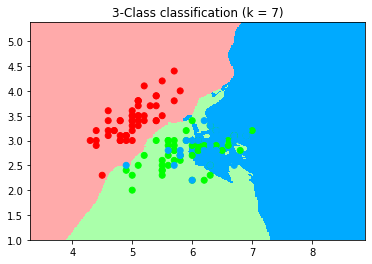

In [113]:

n_neighborss = 7
h=.02
modeloKNN = knn(n_neighbors= n_neighborss)
modeloKNN.fit(Xtrain,ytrain)

#Colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

#Limites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))


Z = modeloKNN.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighborss))
plt.show()


In [119]:
#2 Regresíon logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score

x1 = np.array(dataset['sepal_length'])
x2 = np.array(dataset['sepal_width'])
X = np.c_[x1,x2]
y = np.array(dataset['species_id'])
y = np.reshape(y,(len(y),1))

Xtrain,Xtest,ytrain,ytest = tts(X,y)

modellogist = LogisticRegression(max_iter=50)
modellogist.fit(Xtrain,ytrain)

ypredtest = modellogist.predict(Xtest)
ypredtrain = modellogist.predict(Xtrain)

"""
precision = precision_score(ytest,ypredtest)
print(round(precision,2))
"""


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



'\nprecision = precision_score(ytest,ypredtest)\nprint(round(precision,2))\n'

In [ ]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""

'\nEvalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses\n'

        Unnamed: 0  points  country
0                0      96       44
1                1      96       40
2                2      96       44
3                3      96       44
4                4      95       15
...            ...     ...      ...
150925      150925      91       22
150926      150926      91       15
150927      150927      91       22
150928      150928      90       15
150929      150929      90       22

[150930 rows x 3 columns]
[[0.00000000e+00 8.00000000e-01 9.16666667e-01]
 [6.62563192e-06 8.00000000e-01 8.33333333e-01]
 [1.32512638e-05 8.00000000e-01 9.16666667e-01]
 ...
 [9.99986749e-01 5.50000000e-01 4.58333333e-01]
 [9.99993374e-01 5.00000000e-01 3.12500000e-01]
 [1.00000000e+00 5.00000000e-01 4.58333333e-01]]


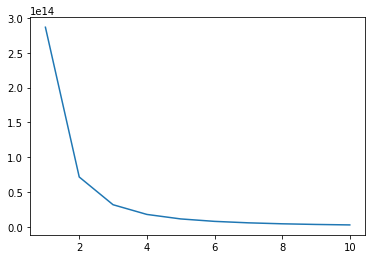

In [147]:
from os import listxattr
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFR

wine = pd.read_excel('/content/wine.xlsx')

from sklearn.preprocessing import LabelEncoder
Xlabel = np.array(wine['country'])
Encoder = LabelEncoder()
Encoder.fit(Xlabel)
Xcod = Encoder.fit_transform(Xlabel)

X_singen =wine.drop(columns = ['price','country','designation','description','province','region_1','region_2','variety','winery'])
X_singen['country']=Xcod

y=np.array(wine['price'])
y=np.reshape(y,(150930,1))
print(X_singen)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xgenerado = np.array(X_singen)
X_scal =scaler.fit_transform(Xgenerado)
print(X_scal)

from sklearn.cluster import KMeans
lista =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X_singen)
  lista.append(k_means.inertia_)

plt.plot(range(1,11),lista)

k_means2 = KMeans(n_clusters = 2) 
k_means2.fit(X_singen)
labels = k_means2.labels_


In [148]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest, ytrain, ytest=tts(X_singen,labels,test_size=0.4,random_state=42)
modeloRFR =RFR(n_estimators=200,random_state=42)
modeloRFR.fit(Xtrain,ytrain)
#Verificando los resultados
from sklearn.metrics import r2_score, mean_squared_error

ytestpred =modeloRFR.predict(Xtest)
r2RFval = r2_score(ytest, ytestpred)
print(r2RFval, "es el coeficiente de determinación del modelo, en validación")

#Evaluando si existe sub o sobreajuste
#Se hace comparando los resultados de entrenamiento y los de prueba
#Sobreajuste_ R2train >>>> R2test -> Es muy complejo, no analizará bien
ytrainpred =modeloRFR.predict(Xtrain)
r2RFentr = r2_score(ytrain, ytrainpred)
print(r2RFentr, "es el coeficiente de determinación del modelo, en entrenamiento")

0.9999586579707673 es el coeficiente de determinación del modelo, en validación
0.9999998774263202 es el coeficiente de determinación del modelo, en entrenamiento


In [149]:
# No existe sobreajuste ya que la diferencia entre el R2train y R2test es muy pequeña

In [120]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

cancer=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
dfX=cancer.drop(columns=['id','diagnosis'])



In [122]:
y = np.array(cancer['diagnosis'])
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)
y = np.reshape(y,(len(y),1))
print(y[:4])
print(np.shape(y))

[[1]
 [1]
 [1]
 [1]]
(569, 1)


In [123]:
escalar = MinMaxScaler()
X = np.array(dfX)
X = escalar.fit_transform(X)
print(X[0:4,:])

[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.55638563 0.36007463 0.50844166 0.37450845
  0.48358978 0.38537513 0.35974441 0.83505155 0.

In [124]:
Xtrain,Xtest,ytrain,ytest = tts(X,y)

In [128]:
#Modelo
ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

Modelo = ModeloClasificador.fit(Xtrain,ytrain,epochs = 500)

Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.6056
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6056
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.6056
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.6056
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6056
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.6056
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6056
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6056
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6056
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6056
Epoch 11/

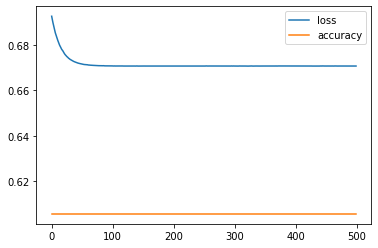

In [129]:
pd.DataFrame(Modelo.history).plot()

In [133]:
"""
Crea una función que aplane la ruta de una imágen
"""
from PIL import Image 

yo= plt.imread("/content/fp.jpg")



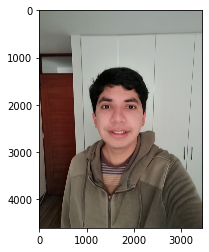

In [134]:
plt.imshow(yo)
plt.show()

In [135]:
print(yo)

[[[131 136 130]
  [130 135 129]
  [128 133 127]
  ...
  [144 153 148]
  [144 153 148]
  [144 153 148]]

 [[129 134 128]
  [128 133 127]
  [126 131 125]
  ...
  [144 154 146]
  [144 153 148]
  [144 153 148]]

 [[122 127 121]
  [124 129 123]
  [126 131 125]
  ...
  [144 154 146]
  [144 154 146]
  [144 154 146]]

 ...

 [[  8   4   3]
  [  6   2   0]
  [  7   3   0]
  ...
  [ 60  57  48]
  [ 59  56  47]
  [ 60  58  46]]

 [[  4   0   0]
  [  4   0   0]
  [  5   1   0]
  ...
  [ 63  60  51]
  [ 62  59  50]
  [ 61  59  47]]

 [[  7   5   6]
  [  6   2   1]
  [  6   2   0]
  ...
  [ 64  61  52]
  [ 63  60  51]
  [ 62  60  48]]]


In [136]:
print(np.shape(yo))

(4608, 3456, 3)


In [137]:
yo_vector=yo.flatten()

In [138]:
print(np.shape(yo_vector))

(47775744,)


In [140]:
#funcion aplanadora 
imagen = '/content/fp.jpg'
def Aplanar(imagen):
  image = plt.imread(imagen)
  imagen_vector = image.flatten()  
  return imagen_vector

aplanado = Aplanar(imagen)

print(aplanado.shape)

(47775744,)
